<a href="https://colab.research.google.com/github/rihemmaarefe/breast-cancer-deep-learning/blob/main/Breast_cancer_detection_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pickle

df = pd.read_csv("/content/drive/MyDrive/deepLearning/wisc_bc_data.csv")

In [ ]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                     int64
Label                 object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object


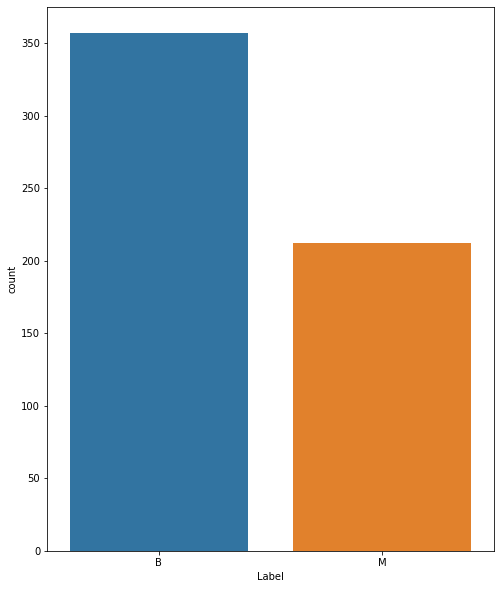

In [ ]:
#Understand the data 
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [ ]:
# Replace categorical values with numbers
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: Label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "id"], axis=1) 
print(X.describe().T) #Needs scaling

x = X

                   count        mean  ...          75%         max
radius_mean        569.0   14.127292  ...    15.780000    28.11000
texture_mean       569.0   19.289649  ...    21.800000    39.28000
perimeter_mean     569.0   91.969033  ...   104.100000   188.50000
area_mean          569.0  654.889104  ...   782.700000  2501.00000
smoothness_mean    569.0    0.096360  ...     0.105300     0.16340
compactness_mean   569.0    0.104341  ...     0.130400     0.34540
concavity_mean     569.0    0.088799  ...     0.130700     0.42680
points_mean        569.0    0.048919  ...     0.074000     0.20120
symmetry_mean      569.0    0.181162  ...     0.195700     0.30400
dimension_mean     569.0    0.062798  ...     0.066120     0.09744
radius_se          569.0    0.405172  ...     0.478900     2.87300
texture_se         569.0    1.216853  ...     1.474000     4.88500
perimeter_se       569.0    2.866059  ...     3.357000    21.98000
area_se            569.0   40.337079  ...    45.190000   542.2

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,Y))

Best alpha using built-in LassoCV: 0.201830
Best score using built-in LassoCV: 0.661795


In [ ]:
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.25268588 0.0906324  0.24227766 ... 0.32271478 0.24876799 0.08310376]
 [0.17128118 0.31247886 0.17614539 ... 0.27237113 0.27104278 0.136626  ]
 [0.19210564 0.24078458 0.18747841 ... 0.25536082 0.28247585 0.15590975]
 ...
 [0.3927777  0.42948935 0.38096883 ... 0.42130584 0.31736645 0.27994228]
 [0.35728146 0.14440311 0.34600235 ... 0.36735395 0.20520402 0.15125279]
 [0.68100715 0.18227934 0.67383042 ... 0.67560137 0.22964715 0.20739866]]


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 26 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

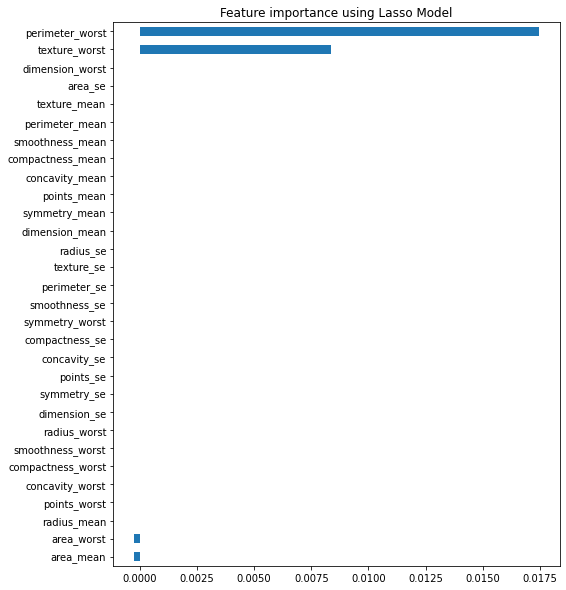

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
dff = pd.DataFrame(df, columns=['perimeter_worst', 'texture_worst', 'area_worst', 'area_mean','Label'])
dff.to_csv('dff')
dff

,perimeter_worst,texture_worst,area_worst,area_mean,Label
0,86.97,15.64,549.1,464.1,B
1,78.28,22.94,424.8,346.4,B
2,79.93,26.44,471.4,373.2,B
3,76.53,15.77,434.0,384.8,B
4,104.50,15.73,819.1,711.8,B
...,...,...,...,...,...
564,95.10,23.89,687.6,537.3,B
565,70.89,19.48,357.1,321.6,B
566,113.80,28.03,973.1,710.6,M
567,103.10,16.93,749.9,644.2,B


In [ ]:
# Replace categorical values with numbers
print("Distribution of data: ", dff['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
yy = dff["Label"].values
print("Labels before encoding are: ", np.unique(yy))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Yy = labelencoder.fit_transform(yy) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Yy))

Distribution of data:  B    357
M    212
Name: Label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
Xx = dff.drop(labels = ["Label"], axis=1) 
print(Xx.describe().T) #Needs scaling


                 count        mean         std  ...     50%      75%      max
perimeter_worst  569.0  107.261213   33.602542  ...   97.66   125.40   251.20
texture_worst    569.0   25.677223    6.146258  ...   25.41    29.72    49.54
area_worst       569.0  880.583128  569.356993  ...  686.50  1084.00  4254.00
area_mean        569.0  654.889104  351.914129  ...  551.10   782.70  2501.00

[4 rows x 8 columns]


In [ ]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 4)
Shape of testing data is:  (143, 4)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pickle

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# model.save('/content/classifier.pkl')
model.save('drive/MyDrive/my_model/model.pkl') 

pkl_filename = 'sequ_model.pkl'
with open(pkl_filename, 'wb') as f:
    pickle.dump(model, f)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                80        
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
 activation_7 (Activation)   (None, 1)                 0         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None
INFO:tensorflow:Assets written to: drive/MyDrive/my_model/model.pkl/assets
INFO:tensorflow:Assets written to: ram://b40d3b8d-d7b7-40be-9891-e29740074bf0/assets


In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 204.4547 - accuracy: 0.5258 - val_loss: 151.7182 - val_accuracy: 0.6434
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 174.6137 - accuracy: 0.5070 - val_loss: 120.9281 - val_accuracy: 0.6434
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 148.0956 - accuracy: 0.5164 - val_loss: 91.5062 - val_accuracy: 0.6434
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 139.2280 - accuracy: 0.5329 - val_loss: 63.1488 - val_accuracy: 0.6503
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 116.2369 - accuracy: 0.5023 - val_loss: 41.8550 - val_accuracy: 0.3357
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 113.2195 - accuracy: 0.3826 - val_loss: 33.8508 - val_accuracy: 0.0490
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 98.1533 - accuracy: 0.4437 - val_loss: 31.9013 - val_accuracy: 0.0909
Epoc

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
y_pred = model.predict([[145.5, 59.85, 0.410, 597.8]])
y_pred * 100

array([[0.0972569]], dtype=float32)

API

In [ ]:
!pip install jinja2
!pip install colabcode
!pip install fastapi

In [ ]:
from fastapi import FastAPI, Request
from fastapi.templating import Jinja2Templates
from fastapi.responses import HTMLResponse
from fastapi.staticfiles import StaticFiles
from pydantic import BaseModel
import requests
import pickle

app = FastAPI()
# templates = Jinja2Templates(directory="templates")
# app.mount("/static", StaticFiles(directory="static"), name="static")


with open("sequ_model.pkl", "rb") as f:
    prediction_model = pickle.load(f)


# Home page
# @app.get("/", response_class=HTMLResponse)
# async def Home(request: Request):
#     return templates.TemplateResponse("detection_test.html", {"request": request})
    
#data
@app.get("/")
async def read_root():
  return {"message": "Breast Cancer detection using deep learning !!"}


class CancerPred(BaseModel):
    perimeter_worst: float
    texture_worst : float
    area_worst : float
    area_mean : float



@app.post("/prediction/")
async def predict(preds: CancerPred):
  pred = preds.dict()
  perimeter_worst = pred['perimeter_worst']
  texture_worst = pred['texture_worst']
  area_worst = pred['area_worst']
  area_mean = pred['area_mean']

  pred_pr = prediction_model.predict([[perimeter_worst, texture_worst, area_worst, area_mean]]).tolist()[0]

  return {'prediction': pred_pr}


In [ ]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://33d7-35-221-219-254.ngrok.io" -> "http://localhost:12000"


INFO:     Started server process [61]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


INFO:     88.243.136.70:0 - "GET / HTTP/1.1" 200 OK
INFO:     88.243.136.70:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     88.243.136.70:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     88.243.136.70:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     88.243.136.70:0 - "POST /prediction/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [61]
